In [21]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from paddleocr import PaddleOCR

In [22]:
image_path="mceclip3.png"
def extract_text_from_image(image_path):
    ocr = PaddleOCR(use_angle_cls=True, lang='en')
    results = ocr.ocr(image_path, cls=True)
    
    extracted_data = []
    for line in results:
        for word_info in line:
            text = word_info[1][0]
            confidence = word_info[1][1]
            extracted_data.append([text, confidence])
    
    return extracted_data

In [23]:
def process_table_data(extracted_data):
    df = pd.DataFrame(extracted_data, columns=['Text', 'Confidence'])
    df['Confidence'] = df['Confidence'].astype(float)
    return df

In [24]:
def analyze_data(df):
    print("\nExtracted Data:")
    print(df)
    
    print("\nBasic Statistics:")
    print(df.describe())
    
    # Plot confidence distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Confidence'], bins=10, kde=True)
    plt.title('Confidence Score Distribution')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.show()

In [25]:
def main():
    image_path = 'mceclip3.png'  # Replace with your image path
    extracted_data = extract_text_from_image(image_path)
    
    if not extracted_data:
        print("No text detected in the image.")
        return
    
    df = process_table_data(extracted_data)
    analyze_data(df)


[2025/03/10 09:55:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\UMESH SOLANKI/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\UMESH SOLANKI/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_sha

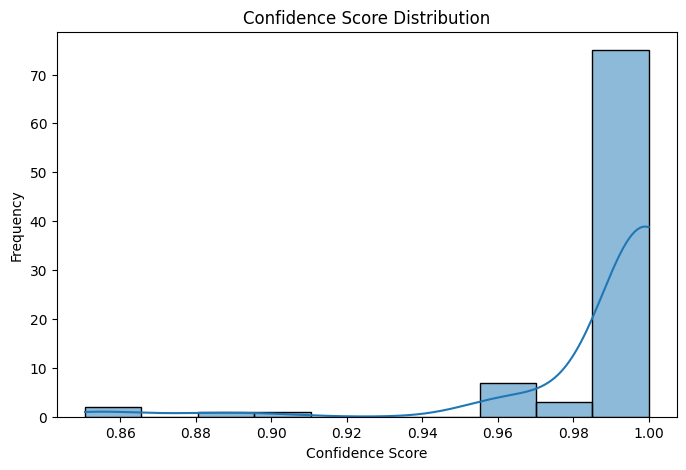

In [26]:
if __name__ == "__main__":
    main()